In [25]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage.morphology import binary_dilation


In [16]:
final_image = np.load('subBeadPackPy.npy')

In [17]:
ps.metrics.porosity(final_image)

0.35295867919921875

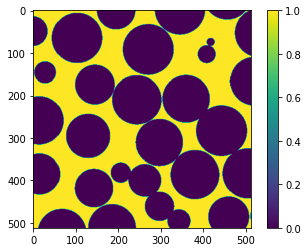

In [18]:
plt.imshow(final_image[:,:,100])
plt.colorbar()

In [19]:
#lt = ps.filters.local_thickness(final_image)
#plt.imshow(lt[:,:,100])

100%|██████████| 25/25 [00:00<00:00, 163.06it/s]


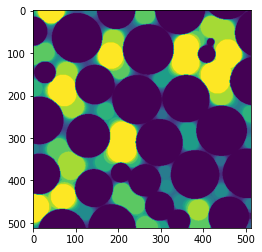

In [20]:
lt = ps.filters.local_thickness(final_image[:,:,100])
plt.imshow(lt)

In [28]:
snow_out = ps.filters.snow_partitioning(final_image, r_max=4, sigma=0.4, return_all=True)

____________________________________________________________
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  890
Peaks after trimming saddle points:  777
Peaks after trimming nearby peaks:  681


/home/akendrick/anaconda3/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


TypeError: Invalid shape (512, 512, 512) for image data

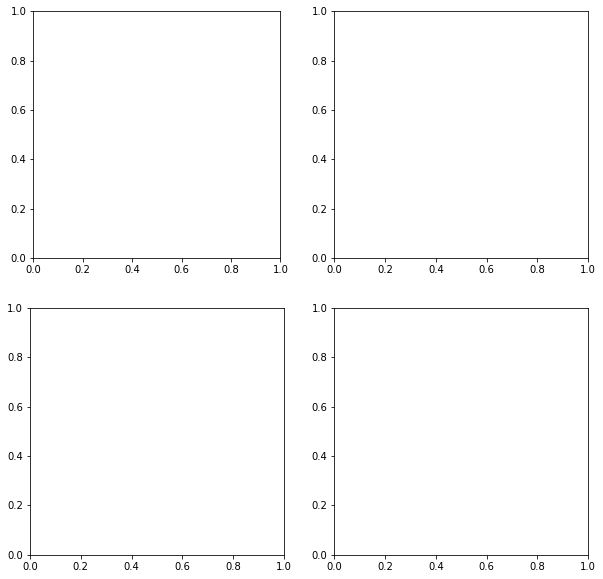

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[10, 10])
ax1.imshow(snow_out.im, origin='lower')
ax2.imshow(snow_out.dt, origin='lower')
dt_peak = snow_out.dt.copy()
peaks_dilated = binary_dilation(snow_out.peaks > 0)
dt_peak[peaks_dilated > 0] = np.nan
cmap = cm.viridis
cmap.set_bad('red', 1.)
ax3.imshow(dt_peak, origin='lower', cmap=cmap)
ax4.imshow(snow_out.regions, origin='lower')
plt.show()